In [65]:
import numpy as np

In [66]:
classes = ['cat', 'cow', 'dog', 'lamb', 'zebra']

In [67]:
data_dir = '/content/dataset'

In [68]:
def extract_hog_features(img_path):
  img =cv2.imread(img_path)
  if img is None:
    print(f"Error loading image: {img_path}")
    return None
  img = cv2.resize(img, (128, 128))
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  features = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
  return features

In [69]:
X , y = [] , []

In [70]:
import os
import cv2
from skimage.feature import hog
for label, cls in enumerate(classes):
  cls_dir = os.path.join(data_dir, cls)
  if not os.path.isdir(cls_dir):
    continue
  for file in os.listdir(cls_dir):
    path = os.path.join(cls_dir, file)
    features = extract_hog_features(path)
    if features is not None:
      X.append(features)
      y.append(label)

In [71]:
X = np.array(X)
y= np.array(y)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100 , random_state= 42)
clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
rf_y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy for Random Forest Classification Model: {accuracy*100} %")
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred, target_names=classes))

Accuracy for Random Forest Classification Model: 59.43396226415094 %

Classification Report:
              precision    recall  f1-score   support

         cat       1.00      0.91      0.95        22
         cow       0.48      0.50      0.49        20
         dog       0.44      0.33      0.38        21
        lamb       0.45      0.71      0.56        21
       zebra       0.69      0.50      0.58        22

    accuracy                           0.59       106
   macro avg       0.61      0.59      0.59       106
weighted avg       0.62      0.59      0.59       106



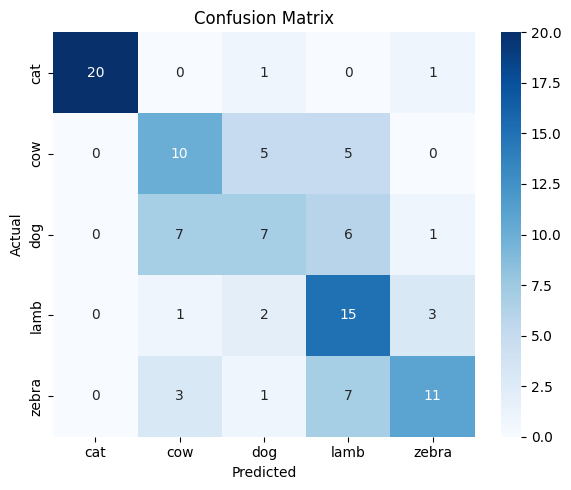



Sample 65: Predicted: lamb | Actual: dog
Sample 86: Predicted: dog | Actual: dog
Sample 1: Predicted: cow | Actual: zebra
Sample 20: Predicted: lamb | Actual: lamb
Sample 6: Predicted: lamb | Actual: lamb


In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import random

print('\n')
for i in random.sample(range(len(X_test)), 5):
    print(f"Sample {i}: Predicted: {classes[rf_y_pred[i]]} | Actual: {classes[y_test[i]]}")

In [75]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=3 , random_state = 42)
clf.fit(X_train, y_train)
Ridge_y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, Ridge_y_pred)
print(f"Accuracy for RidgeClassification Model: {accuracy*100} %")
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, Ridge_y_pred, target_names=classes))

Accuracy for RidgeClassification Model: 65.09433962264151 %

Classification Report:
              precision    recall  f1-score   support

         cat       0.95      0.91      0.93        22
         cow       0.50      0.40      0.44        20
         dog       0.64      0.43      0.51        21
        lamb       0.49      0.81      0.61        21
       zebra       0.75      0.68      0.71        22

    accuracy                           0.65       106
   macro avg       0.67      0.65      0.64       106
weighted avg       0.67      0.65      0.65       106



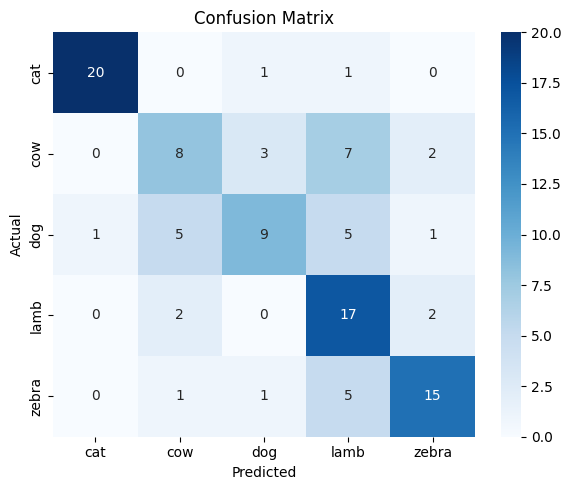



Sample 97: Predicted: cat | Actual: cat
Sample 11: Predicted: lamb | Actual: lamb
Sample 28: Predicted: zebra | Actual: zebra
Sample 60: Predicted: zebra | Actual: zebra
Sample 86: Predicted: dog | Actual: dog


In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, Ridge_y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import random

print('\n')
for i in random.sample(range(len(X_test)), 5):
    print(f"Sample {i}: Predicted: {classes[Ridge_y_pred[i]]} | Actual: {classes[y_test[i]]}")

In [77]:
from scipy.stats import mode

hybrid_preds = np.array([Ridge_y_pred, rf_y_pred])
final_preds, _ = mode(hybrid_preds, axis=0)
final_preds = final_preds.flatten()

print("Hybrid Model Accuracy:", accuracy_score(y_test, final_preds)*100 ,'%')
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, final_preds, target_names=classes))

Hybrid Model Accuracy: 63.20754716981132 %

Classification Report:
              precision    recall  f1-score   support

         cat       0.95      0.95      0.95        22
         cow       0.45      0.65      0.53        20
         dog       0.50      0.38      0.43        21
        lamb       0.55      0.76      0.64        21
       zebra       0.90      0.41      0.56        22

    accuracy                           0.63       106
   macro avg       0.67      0.63      0.62       106
weighted avg       0.68      0.63      0.63       106



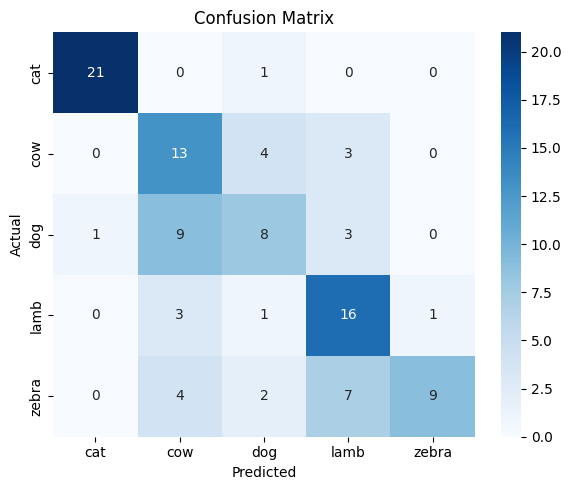



Sample 52: Predicted: cat | Actual: cat
Sample 103: Predicted: cat | Actual: cat
Sample 80: Predicted: cat | Actual: cat
Sample 5: Predicted: lamb | Actual: cow
Sample 35: Predicted: cow | Actual: dog


In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import random

print('\n')
for i in random.sample(range(len(X_test)), 5):
    print(f"Sample {i}: Predicted: {classes[final_preds[i]]} | Actual: {classes[y_test[i]]}")